In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial

In [ ]:
athletes = pd.read_csv("../data/derived/athletes.csv")
summer_athletes = athletes[athletes['Season'] == 'Summer']
winter_athletes = athletes[athletes['Season'] == 'Winter']

In [3]:
summer_participation = summer_athletes.groupby('Year')['NOC'].nunique()
winter_participation = winter_athletes.groupby('Year')['NOC'].nunique()

years = sorted(athletes['Year'].unique())
summer_years = sorted(summer_athletes['Year'].unique())
winter_years = sorted(winter_athletes['Year'].unique())


In [9]:
all_years = set(summer_years).union(winter_years)

#missing years are set to zero
summer_participation_filled = summer_participation.reindex(all_years, fill_value=0)
winter_participation_filled = winter_participation.reindex(all_years, fill_value=0)

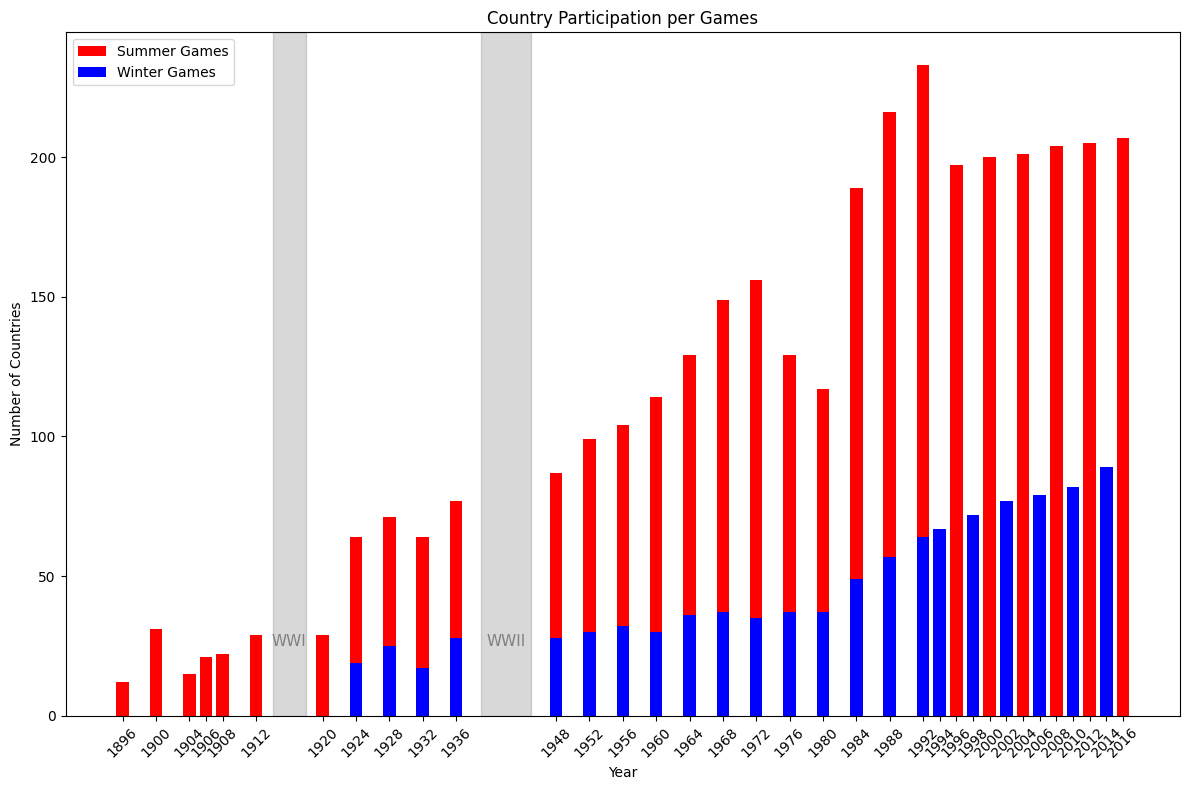

In [14]:
plt.figure(figsize=(12, 8))
plt.grid(False)

plt.bar(list(all_years), summer_participation_filled, color='red', width = 1.5, label='Summer Games', bottom = winter_participation_filled)
plt.bar(list(all_years), winter_participation_filled, color='blue', width = 1.5, label='Winter Games')

plt.axvspan(1914, 1918, color='gray', alpha=0.3)
plt.axvspan(1939, 1945, color='gray', alpha=0.3)
plt.text(1942, 25, 'WWII', fontsize= 11, ha='center', color='grey')
plt.text(1916, 25, 'WWI', fontsize= 11, ha='center', color='grey')


plt.title('Country Participation per Games')
plt.xlabel('Year')
plt.ylabel('Number of Countries')
plt.legend(loc = 'upper left')
plt.xticks(rotation=45, ticks= years)
plt.tight_layout()
plt.show()

## ATHLETES PARTICIPATION

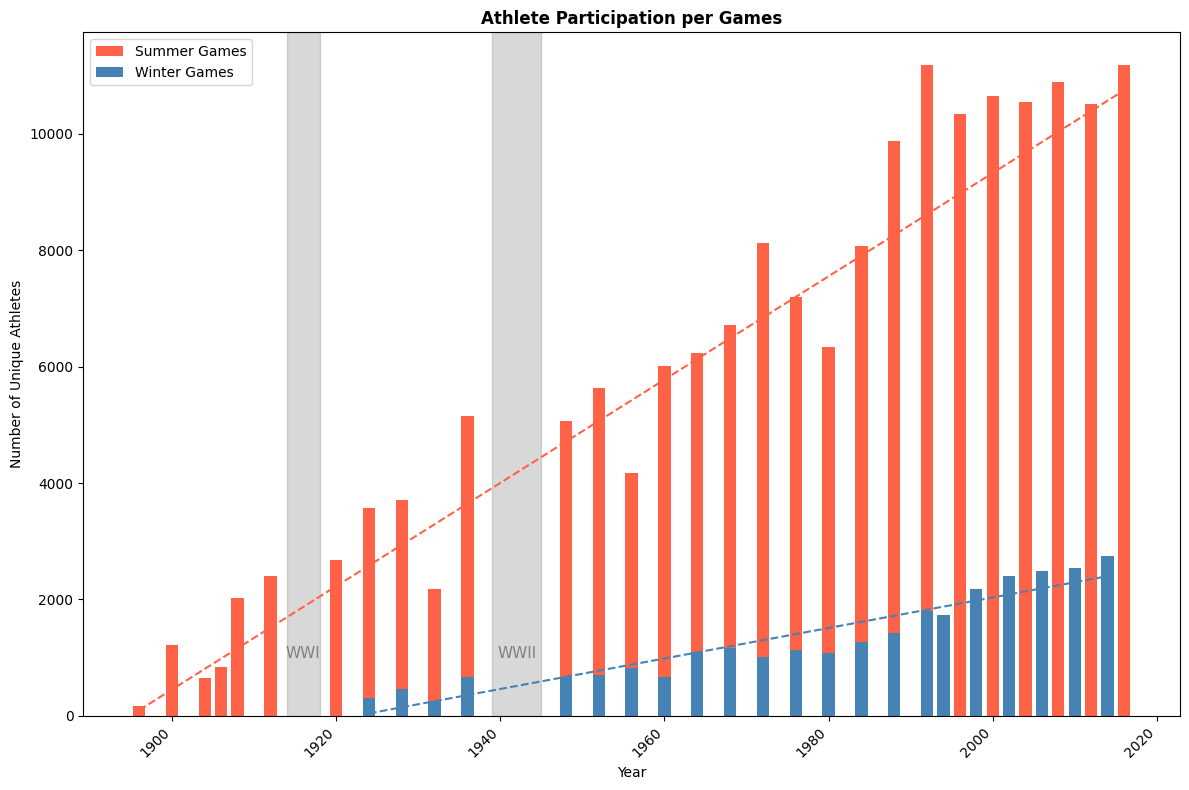

In [34]:

unique_athletes = athletes.groupby('Year')['ID'].nunique().reset_index(name='Number of Athletes')
unique_summer_athletes = summer_athletes.groupby('Year')['ID'].nunique().reset_index(name='Number of Athletes')
unique_winter_athletes = winter_athletes.groupby('Year')['ID'].nunique().reset_index(name='Number of Athletes')

summer_athletes_filled = unique_summer_athletes.set_index('Year').reindex(all_years).fillna(0)['Number of Athletes'].values
winter_athletes_filled = unique_winter_athletes.set_index('Year').reindex(all_years).fillna(0)['Number of Athletes'].values

plt.figure(figsize=(12, 8))
#plt.bar(unique_athletes['Year'], unique_athletes['Number of Athletes'], width = 1.5, color='grey')
plt.bar(list(all_years), summer_athletes_filled, width = 1.5, color='#FF6347', bottom = winter_athletes_filled, label = 'Summer Games')
plt.bar(list(all_years), winter_athletes_filled, width = 1.5, color='#4682B4', label = 'Winter Games')

summer_years_array = np.array(list(summer_years))
winter_years_array = np.array(list(winter_years))

summer_coeffs = Polynomial.fit(summer_years_array, unique_summer_athletes['Number of Athletes'], 1)
winter_coeffs = Polynomial.fit(winter_years_array, unique_winter_athletes['Number of Athletes'], 1)

summer_trend_line = summer_coeffs(summer_years_array)
winter_trend_line = winter_coeffs(winter_years_array)

plt.plot(summer_years_array, summer_trend_line, color='#FF6347', linestyle='--')
plt.plot(winter_years_array, winter_trend_line, color='#4682B4', linestyle='--')

#WORLD WAR INDICATIONS
plt.axvspan(1914, 1918, color='gray', alpha=0.3)
plt.axvspan(1939, 1945, color='gray', alpha=0.3)
plt.text(1942, 1000, 'WWII', fontsize= 11, ha='center', color='grey')
plt.text(1916, 1000, 'WWI', fontsize= 11, ha='center', color='grey')

plt.title('Athlete Participation per Games', fontweight = 'bold')
plt.xlabel('Year')
plt.ylabel('Number of Unique Athletes')
plt.legend()
plt.grid(False)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

    


## GENDER PARTICIPATION

In [87]:
gender_participation = athletes.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
gender_participation_pivot = gender_participation.pivot(index='Year', columns='Sex', values='ID').fillna(0)

<Figure size 1200x800 with 0 Axes>

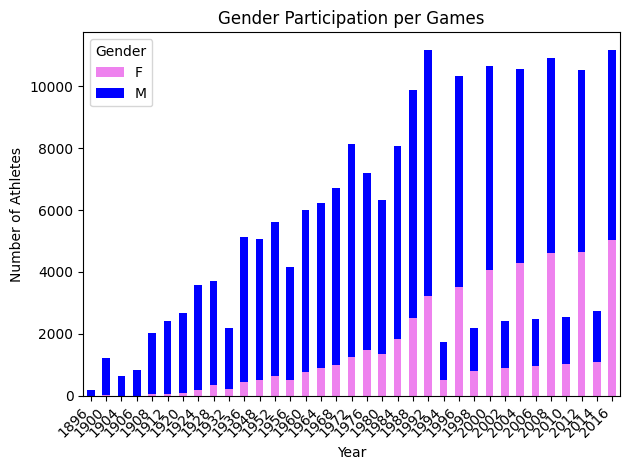

In [91]:
plt.figure(figsize=(12, 8))
gender_participation_pivot.plot(kind='bar', stacked=True, color=['violet', 'blue'])
plt.title('Gender Participation per Games')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45, ha = 'right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()